In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip

--2021-10-18 18:45:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39674 (39K) [application/x-httpd-php]
Saving to: ‘RCdata.zip’

RCdata.zip          100%[===================>]  38.74K  --.-KB/s    in 0.1s    

2021-10-18 18:45:21 (298 KB/s) - ‘RCdata.zip’ saved [39674/39674]



In [3]:
!unzip /content/RCdata.zip

Archive:  /content/RCdata.zip
  inflating: chefmozaccepts.csv      
  inflating: chefmozcuisine.csv      
  inflating: chefmozhours4.csv       
  inflating: chefmozparking.csv      
  inflating: geoplaces2.csv          
  inflating: rating_final.csv        
  inflating: README                  
  inflating: usercuisine.csv         
  inflating: userpayment.csv         
  inflating: userprofile.csv         


In [4]:
import pandas as pd
 
accepts = pd.read_csv('/content/chefmozaccepts.csv')
cuisine = pd.read_csv('/content/chefmozcuisine.csv')
hours = pd.read_csv('/content/chefmozhours4.csv')
parking = pd.read_csv('/content/chefmozparking.csv')
geo = pd.read_csv('/content/geoplaces2.csv', encoding = "ISO-8859-1")
usercuisine = pd.read_csv('/content/usercuisine.csv')
payment = pd.read_csv('/content/userpayment.csv')
profile = pd.read_csv('/content/userprofile.csv')
rating = pd.read_csv('/content/rating_final.csv')
 
print('Jumlah data pembayaran yang diterima restoran: ', len(accepts.placeID.unique()))
print('Jumlah data masakan pada restoran: ', len(cuisine.placeID.unique()))
print('Jumlah data waktu buka restoran: ', len(hours.placeID.unique()))
print('Jumlah data lokasi restoran: ', len(geo.placeID.unique()))
print('Jumlah data masakan pengguna: ', len(usercuisine.userID.unique()))
print('Jumlah data profil pengguna: ', len(profile.userID.unique()))
print('Jumlah data penilaian yang diberikan pengguna: ', len(rating.userID.unique()))
print('Jumlah data penilaian restoran: ', len(rating.placeID.unique()))

Jumlah data pembayaran yang diterima restoran:  615
Jumlah data masakan pada restoran:  769
Jumlah data waktu buka restoran:  694
Jumlah data lokasi restoran:  130
Jumlah data masakan pengguna:  138
Jumlah data profil pengguna:  138
Jumlah data penilaian yang diberikan pengguna:  138
Jumlah data penilaian restoran:  130


In [5]:
df = rating
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [8]:
user_ids = df['userID'].unique().tolist()
print('User ID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User ID: ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User ID: ', user_encoded_to_user)

df.replace({'userID':user_to_user_encoded}, inplace=True)
df

User ID:  ['U1077', 'U1068', 'U1067', 'U1103', 'U1107', 'U1044', 'U1070', 'U1031', 'U1082', 'U1023', 'U1060', 'U1015', 'U1123', 'U1021', 'U1026', 'U1083', 'U1108', 'U1012', 'U1093', 'U1030', 'U1066', 'U1127', 'U1017', 'U1100', 'U1133', 'U1118', 'U1072', 'U1080', 'U1063', 'U1074', 'U1117', 'U1020', 'U1051', 'U1055', 'U1053', 'U1035', 'U1064', 'U1081', 'U1001', 'U1014', 'U1088', 'U1056', 'U1134', 'U1106', 'U1126', 'U1124', 'U1018', 'U1125', 'U1119', 'U1076', 'U1022', 'U1094', 'U1116', 'U1105', 'U1075', 'U1007', 'U1115', 'U1024', 'U1132', 'U1005', 'U1120', 'U1004', 'U1037', 'U1052', 'U1036', 'U1038', 'U1071', 'U1114', 'U1084', 'U1049', 'U1019', 'U1069', 'U1113', 'U1104', 'U1079', 'U1045', 'U1009', 'U1016', 'U1047', 'U1095', 'U1034', 'U1078', 'U1099', 'U1008', 'U1040', 'U1121', 'U1110', 'U1042', 'U1013', 'U1054', 'U1111', 'U1128', 'U1062', 'U1101', 'U1135', 'U1032', 'U1048', 'U1092', 'U1085', 'U1109', 'U1102', 'U1098', 'U1046', 'U1122', 'U1138', 'U1033', 'U1089', 'U1003', 'U1091', 'U1027',

,userID,placeID,rating,food_rating,service_rating
0,0,135085,2,2,2
1,0,135038,2,2,1
2,0,132825,2,2,2
3,0,135060,1,2,2
4,1,135104,1,1,2
...,...,...,...,...,...
1156,136,132630,1,1,1
1157,137,132715,1,1,0
1158,1,132733,1,1,0
1159,1,132594,1,1,1


In [9]:
resto_ids = df['placeID'].unique().tolist()
 
# Melakukan proses encoding placeID
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}
 
# Melakukan proses encoding angka ke placeID
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)}

df.replace({'placeID':resto_to_resto_encoded}, inplace=True)
df

,userID,placeID,rating,food_rating,service_rating
0,0,0,2,2,2
1,0,1,2,2,1
2,0,2,2,2,2
3,0,3,1,2,2
4,1,4,1,1,2
...,...,...,...,...,...
1156,136,8,1,1,1
1157,137,21,1,1,0
1158,1,10,1,1,0
1159,1,23,1,1,1


In [10]:
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah resto
num_resto = len(resto_encoded_to_resto)
print(num_resto)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_resto, min_rating, max_rating
))

138
130
Number of User: 138, Number of Resto: 130, Min Rating: 0.0, Max Rating: 2.0


In [11]:
df = df.sample(frac=1, random_state=42)
df

,userID,placeID,rating,food_rating,service_rating
538,63,116,1.0,1,1
673,11,115,2.0,2,2
578,78,117,0.0,0,0
242,41,71,2.0,2,2
1063,125,64,1.0,1,1
...,...,...,...,...,...
1044,123,94,0.0,0,0
1095,124,76,2.0,2,2
1130,132,14,1.0,1,0
860,110,126,1.0,1,1


In [12]:
x = df[['userID', 'placeID']].values
y = df['rating'].apply(lambda x: (x - min_rating)/(max_rating - min_rating)).values

In [13]:
x = df[['userID', 'placeID']].values
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 63 116]
 [ 11 115]
 [ 78 117]
 ...
 [132  14]
 [110 126]
 [129   6]] [0.5 1.  0.  ... 0.5 0.5 0. ]


In [14]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [15]:
model = RecommenderNet(num_users, num_resto, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [16]:
history = model.fit(
    x_train,
    y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val)
)

Epoch 1/100
116/116 [==============================] - 4s 6ms/step - loss: 0.7034 - root_mean_squared_error: 0.4046 - val_loss: 0.6952 - val_root_mean_squared_error: 0.4023
Epoch 2/100
116/116 [==============================] - 0s 4ms/step - loss: 0.6714 - root_mean_squared_error: 0.3849 - val_loss: 0.6908 - val_root_mean_squared_error: 0.3996
Epoch 3/100
116/116 [==============================] - 1s 5ms/step - loss: 0.6585 - root_mean_squared_error: 0.3767 - val_loss: 0.6887 - val_root_mean_squared_error: 0.3983
Epoch 4/100
116/116 [==============================] - 1s 4ms/step - loss: 0.6481 - root_mean_squared_error: 0.3701 - val_loss: 0.6833 - val_root_mean_squared_error: 0.3950
Epoch 5/100
116/116 [==============================] - 0s 4ms/step - loss: 0.6481 - root_mean_squared_error: 0.3702 - val_loss: 0.6805 - val_root_mean_squared_error: 0.3932
Epoch 6/100
116/116 [==============================] - 1s 5ms/step - loss: 0.6376 - root_mean_squared_error: 0.3634 - val_loss: 0.6773 

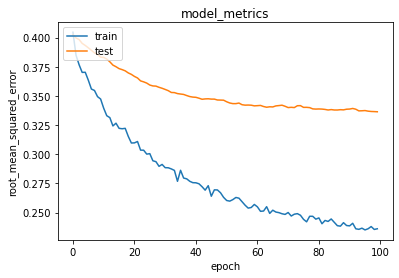

In [17]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
df = pd.read_csv('rating_final.csv')

In [21]:
all_resto_name = pd.merge(df, geo[['placeID','name']], on='placeID', how='left')
 
# Print dataframe all_resto_name
all_resto_name

,userID,placeID,rating,food_rating,service_rating,name
0,U1077,135085,2,2,2,Tortas Locas Hipocampo
1,U1077,135038,2,2,1,Restaurant la Chalita
2,U1077,132825,2,2,2,puesto de tacos
3,U1077,135060,1,2,2,Restaurante Marisco Sam
4,U1068,135104,1,1,2,vips
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,palomo tec
1157,U1011,132715,1,1,0,tacos de la estacion
1158,U1068,132733,1,1,0,Little Cesarz
1159,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec


In [22]:
all_resto = pd.merge(all_resto_name, cuisine, on='placeID', how='left')
all_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
1,U1077,135038,2,2,1,Restaurant la Chalita,NaN
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
...,...,...,...,...,...,...,...
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican


In [23]:
all_resto_clean = all_resto.dropna()
all_resto_clean

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
5,U1068,132740,0,0,0,Carreton de Flautas y Migadas,Mexican
...,...,...,...,...,...,...,...
1325,U1043,132732,1,1,1,Taqueria EL amigo,Mexican
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria


In [24]:
fix_resto = all_resto_clean.sort_values('placeID', ascending=True)
fix_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
438,U1024,135106,1,1,1,El Rincón de San Francisco,Mexican
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian
99,U1030,135109,0,0,0,Paniroles,Italian


In [25]:
fix_resto = fix_resto.replace('Game', 'American')
fix_resto[fix_resto['name']=='KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,American
508,U1052,132851,1,0,2,KFC,American
780,U1015,132851,1,1,1,KFC,American
509,U1052,132851,1,0,2,KFC,American
708,U1008,132851,1,1,1,KFC,American
707,U1008,132851,1,1,1,KFC,American
770,U1037,132851,2,2,1,KFC,American
769,U1037,132851,2,2,1,KFC,American
1187,U1131,132851,2,2,2,KFC,American
574,U1069,132851,1,0,0,KFC,American


In [26]:
prep = fix_resto
prep.sort_values('placeID')

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
184,U1055,132572,2,2,2,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
1224,U1002,135106,1,1,1,El Rincón de San Francisco,Mexican
99,U1030,135109,0,0,0,Paniroles,Italian
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian


In [27]:
prep = prep.drop_duplicates('placeID')
prep

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
168,U1118,132583,0,0,0,McDonalds Centro,American
24,U1107,132584,2,2,2,Gorditas Dona Tota,Mexican
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...,...,...,...,...
681,U1095,135086,1,2,1,Mcdonalds Parque Tangamanga,Fast_Food
175,U1020,135088,1,2,0,Cafeteria cenidet,Cafeteria
4,U1068,135104,1,1,2,vips,Mexican
488,U1004,135106,2,2,2,El Rincón de San Francisco,Mexican


In [28]:
resto_id = prep['placeID'].tolist()
 
# Mengonversi data series ‘Name’ menjadi dalam bentuk list
resto_name = prep['name'].tolist()
 
# Mengonversi data series ‘Rcuisine’ menjadi dalam bentuk list
resto_cuisine = prep['Rcuisine'].tolist()
 
print(len(resto_id))
print(len(resto_name))
print(len(resto_cuisine))

95
95
95


In [29]:
resto_new = pd.DataFrame({
    'id': resto_id,
    'resto_name': resto_name,
    'cuisine': resto_cuisine
})
resto_new

,id,resto_name,cuisine
0,132560,puesto de gorditas,Regional
1,132572,Cafe Chaires,Cafeteria
2,132583,McDonalds Centro,American
3,132584,Gorditas Dona Tota,Mexican
4,132594,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...
90,135086,Mcdonalds Parque Tangamanga,Fast_Food
91,135088,Cafeteria cenidet,Cafeteria
92,135104,vips,Mexican
93,135106,El Rincón de San Francisco,Mexican


In [32]:
resto_df = resto_new
df = pd.read_csv('rating_final.csv')

user_id = df.userID.sample(1).iloc[0]
resto_visited_by_user = df[df.userID == user_id]

resto_not_visited = resto_df[~resto_df['id'].isin(resto_visited_by_user.placeID.values)]['id']
resto_not_visited = list(
    set(resto_not_visited).intersection(resto_to_resto_encoded.keys())
)

resto_not_visited = [[resto_to_resto_encoded.get(x)] for x  in resto_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

In [34]:
ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
                         resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Resto with high ratings from user')
print('----' * 8)

top_resto_user = (
    resto_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .placeID.values
)

resto_df_rows = resto_df[resto_df['id'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
  print(row.resto_name, ': ', row.cuisine)

print('----' * 8)
print('Top 10 resto recommendation')
print('----' * 8)

recommended_resto = resto_df[resto_df['id'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
  print(row.resto_name, ': ', row.cuisine)

Showing recommendations for users: U1081
Resto with high ratings from user
--------------------------------
puesto de tacos :  Mexican
La Virreina :  Mexican
Abondance Restaurante Bar :  Bar
Tortas Locas Hipocampo :  Fast_Food
--------------------------------
Top 10 resto recommendation
--------------------------------
La Estrella de Dimas :  Mexican
cafe punta del cielo :  Cafeteria
emilianos :  Bar_Pub_Brewery
Restaurant Las Mananitas :  International
Kiku Cuernavaca :  Japanese
El Oceano Dorado :  Mexican
El Rincon de San Francisco :  Mexican
Michiko Restaurant Japones :  Japanese
Restaurant Bar Hacienda los Martinez :  Bar
Mariscos El Pescador :  Seafood
